># REGRESSION

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

># 1 . Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

># 2 . Load the dataset

In [3]:
df = pd.read_csv(r'C:\Users\ehsan\Downloads\avocado.csv\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.shape

(18249, 14)

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

># 3 . Check the presence of missing values

In [12]:
df.isnull().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**To summarise the dataset we see;
14 columns (variables) and 18249 rows (observations)**

There isn't any NULL variable

data types: float64(9), int64(2), object(3)

there are some unnamed/undefined columns

'region','type' and 'date' columns are in object format

># 4 . Preprocessing of data

In [13]:
# drop unnamed column and rename undefined columns;

df = df.drop(['Unnamed: 0'], axis = 1)

df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

># 5 . Datatype Conversion

In [14]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date'], inplace=True, ascending=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


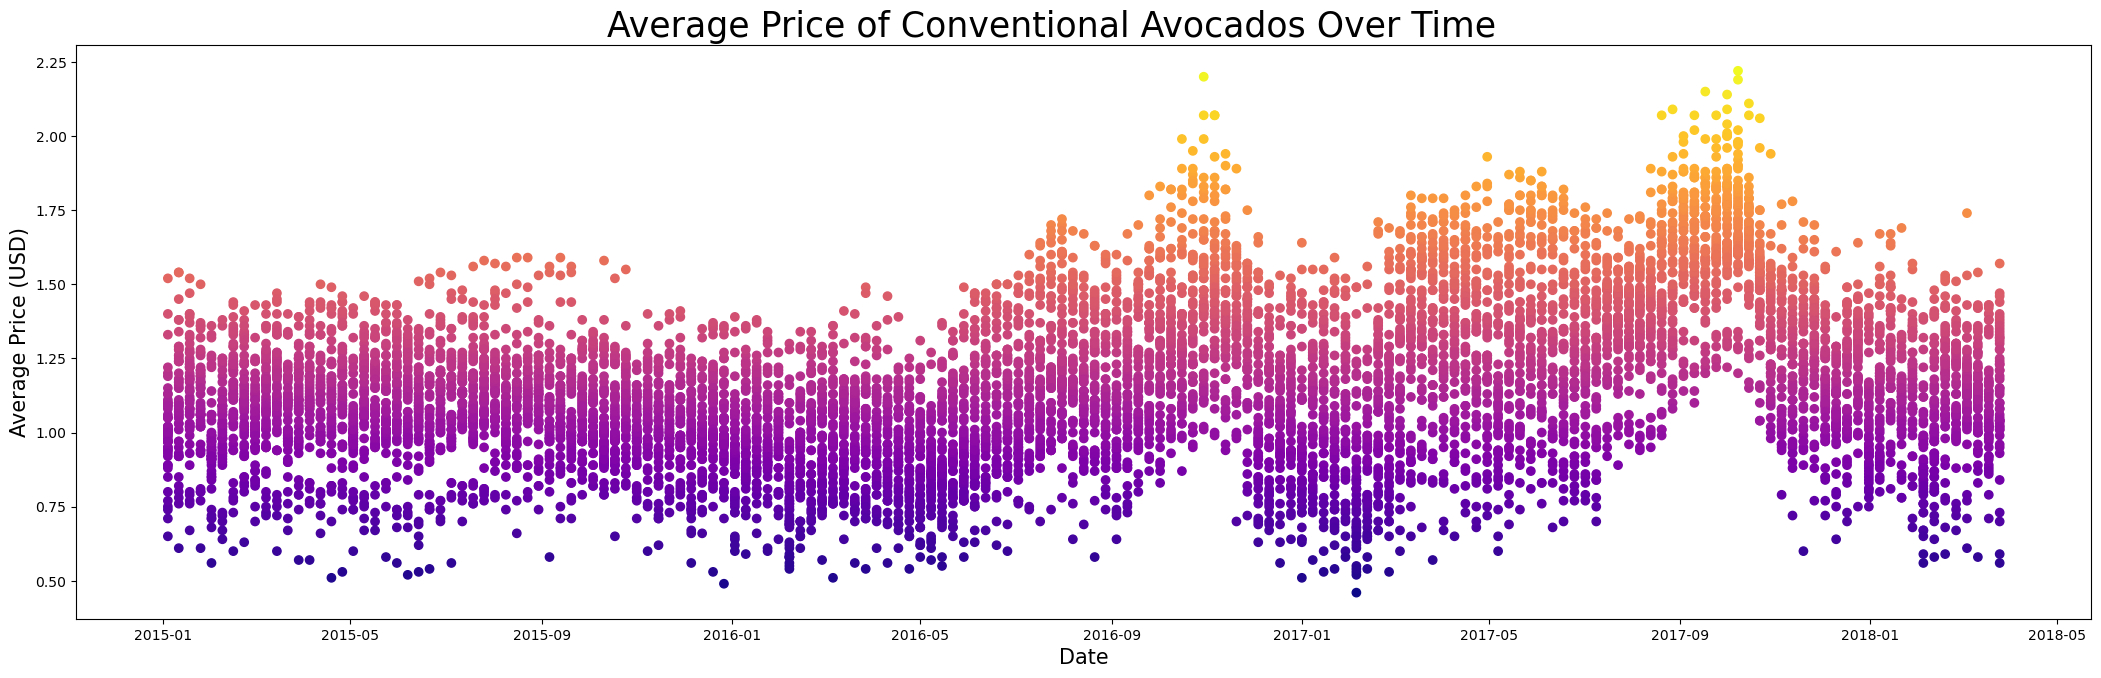

In [15]:
# Average price of Conventional Avocados over time
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)
dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

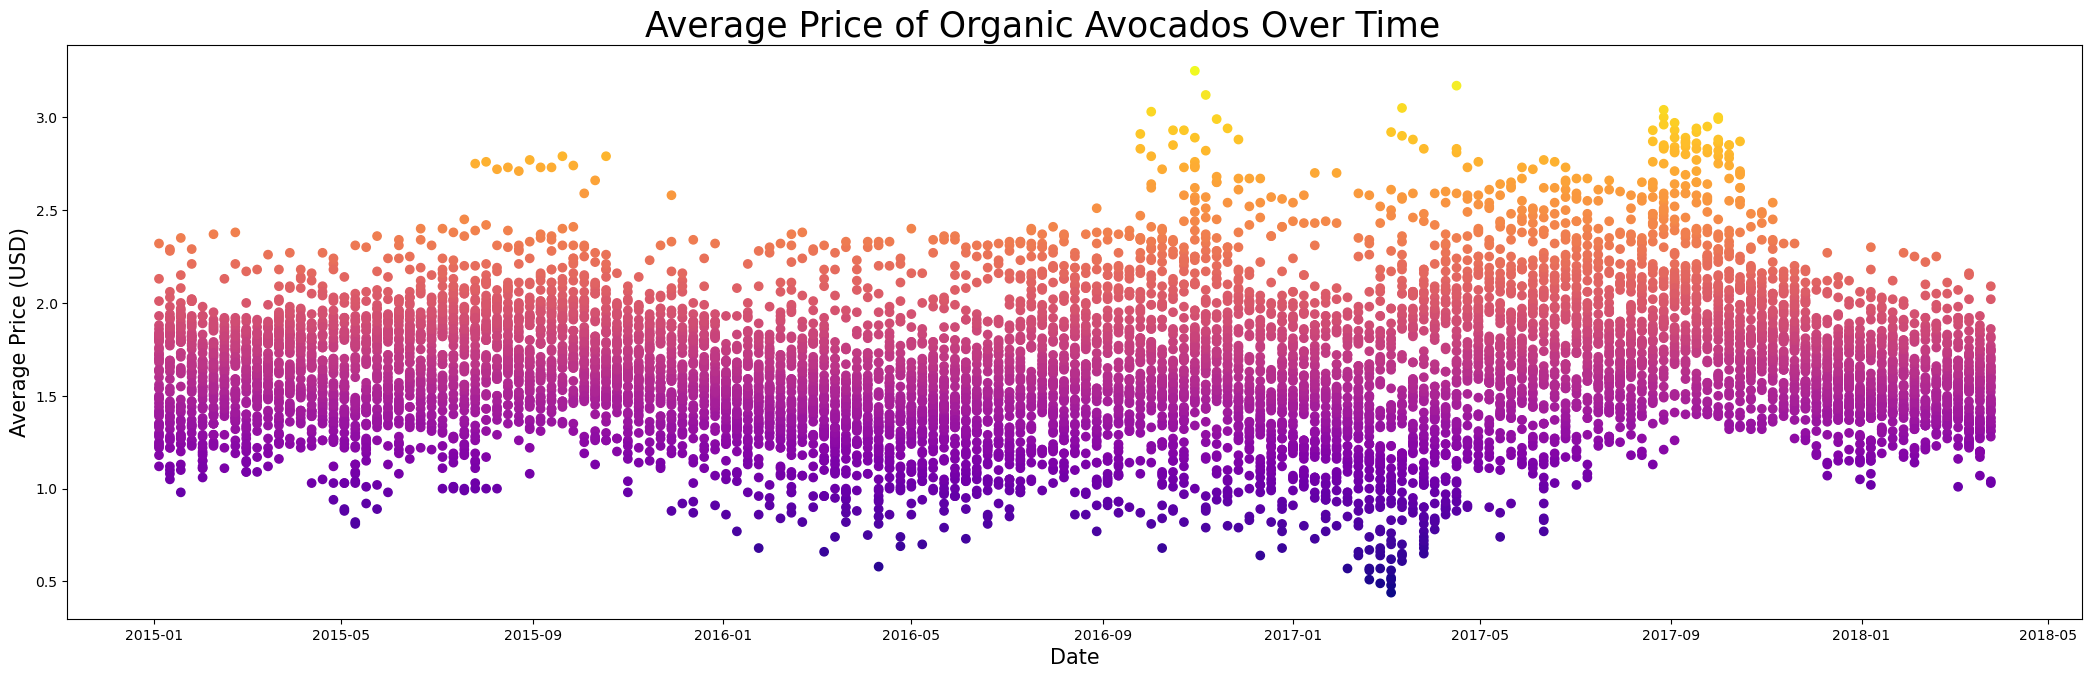

In [16]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [17]:
# Dropping the Date column (date format is not suitable for further analysis)
df = df.drop(['Date'], axis = 1)

In [18]:
# Checking if the sample is balanced
df.groupby('region').size() 

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

**Insights Approximately, there are 338 observations from each region, sample seems balanced.**

In [19]:
len(df.region.unique())

54

In [20]:
df.region.unique() 

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [30]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

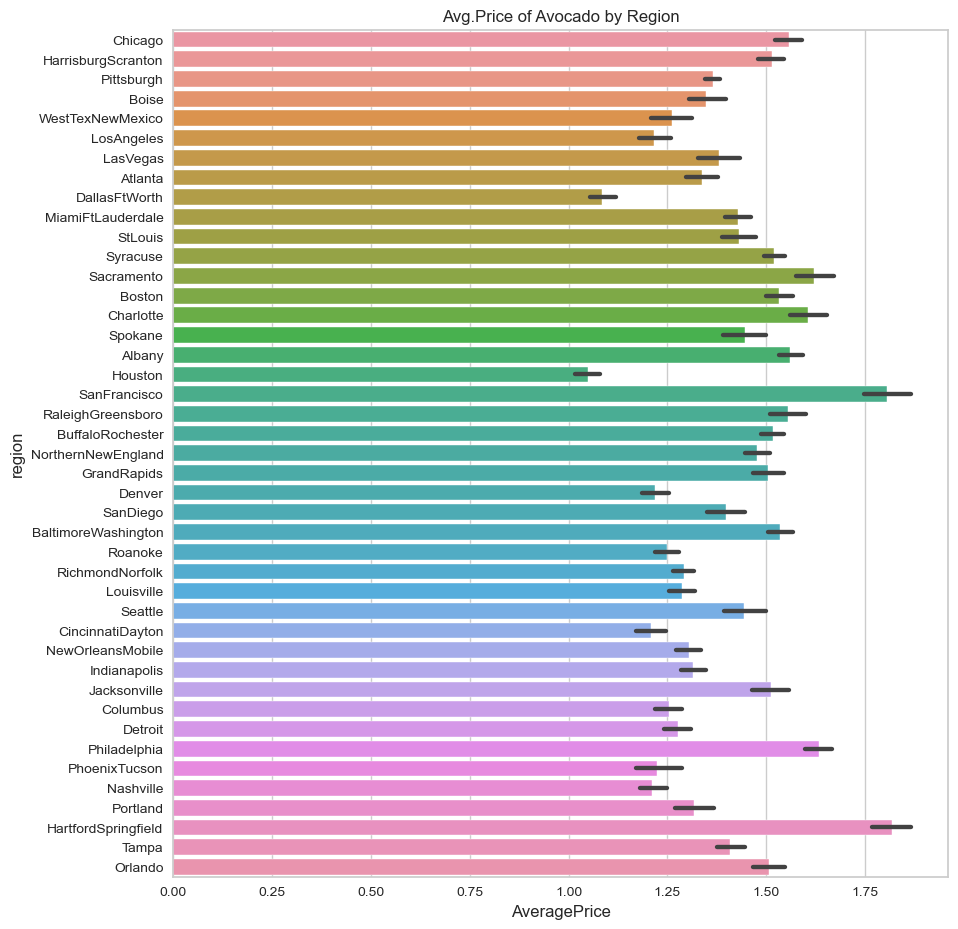

In [31]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

In [32]:
type_counts = df.groupby('type').size()
print(type_counts) 

type
conventional    7267
organic         7264
dtype: int64


**Insights: Types of avocados are also balanced**

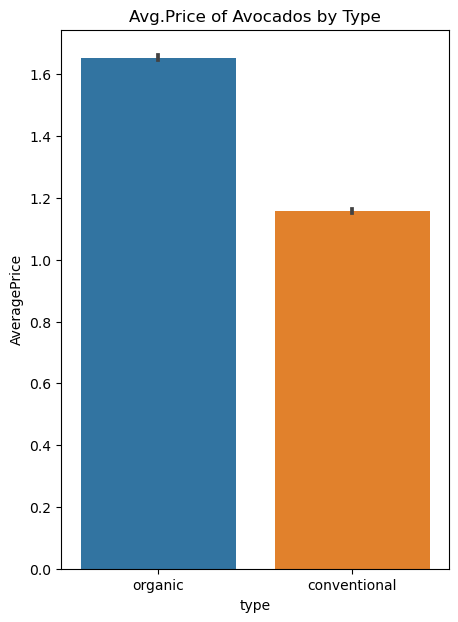

In [21]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= df)

In [22]:
df[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,0.977863,0.920057
Large Hass,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,0.974181,0.905787
XLarge Hass,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,0.872202,0.792314
Small Bags,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,0.967238,0.994335
Large Bags,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,0.880640,0.943009
XLarge Bags,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,0.747157,0.804233
Total Volume,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,1.000000,0.963047
Total Bags,0.920057,0.905787,0.792314,0.994335,0.943009,0.804233,0.963047,1.000000


<Axes: >

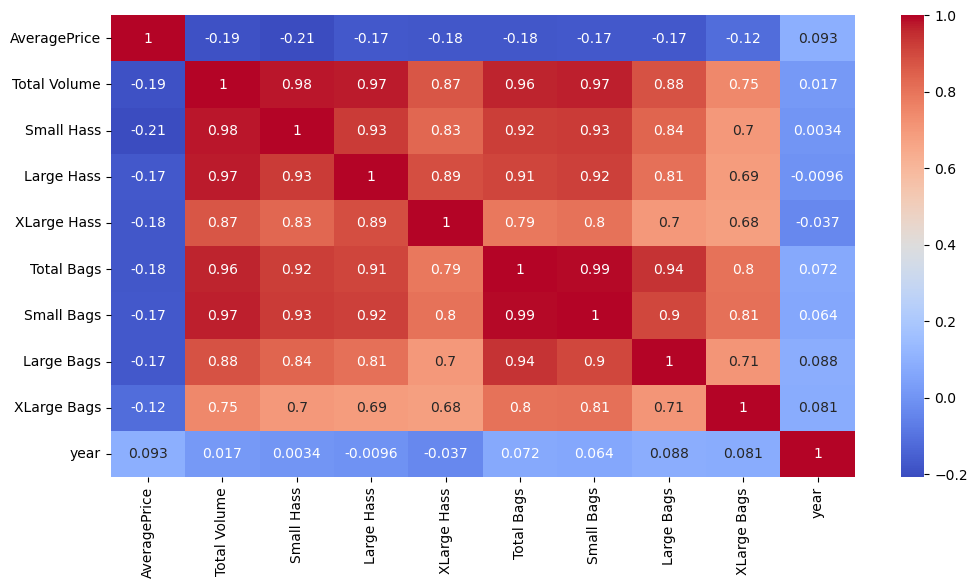

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

**Insights: There is a high correlation between those pairs:**

**1. small hass & total volume (0.89)**

**2. total bags & total volume (0.87)**

**3. small bags & total bags (0.96)**

**Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag. Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them. Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags**

In [24]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,6.346827e+08,1.320664e+08,5443128.28
2016,1.525123e+09,1.672728e+09,1.598798e+08,1.106494e+09,3.366263e+08,20038284.84
2017,1.652038e+09,1.544735e+09,9.121751e+07,1.222953e+09,3.993390e+08,23997172.34
2018,4.604997e+08,4.077587e+08,2.293259e+07,3.607414e+08,1.235840e+08,7210591.87


Text(0, 0.5, '')

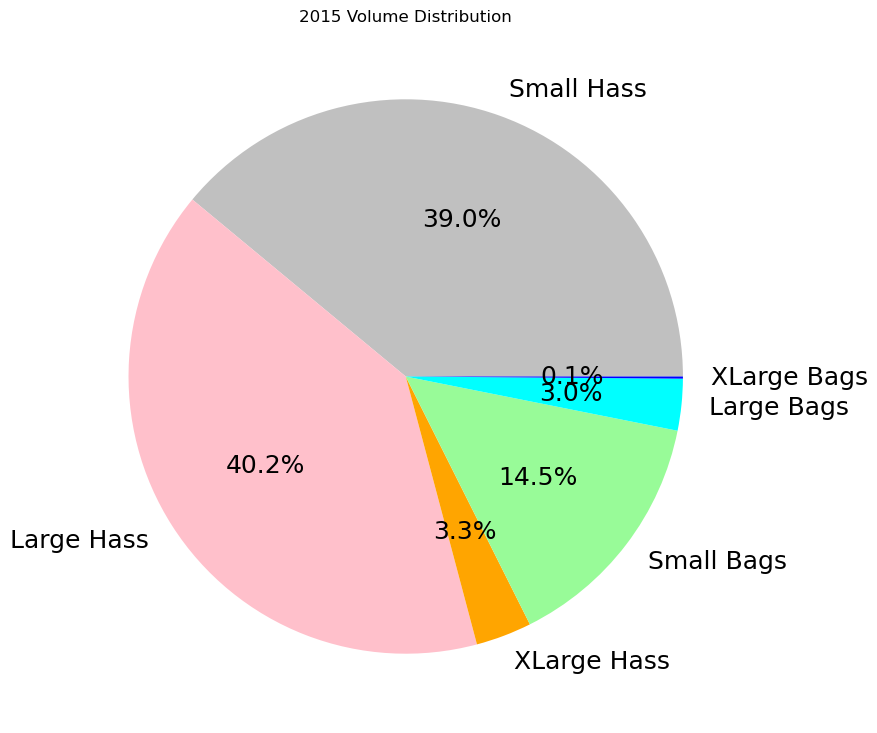

In [25]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

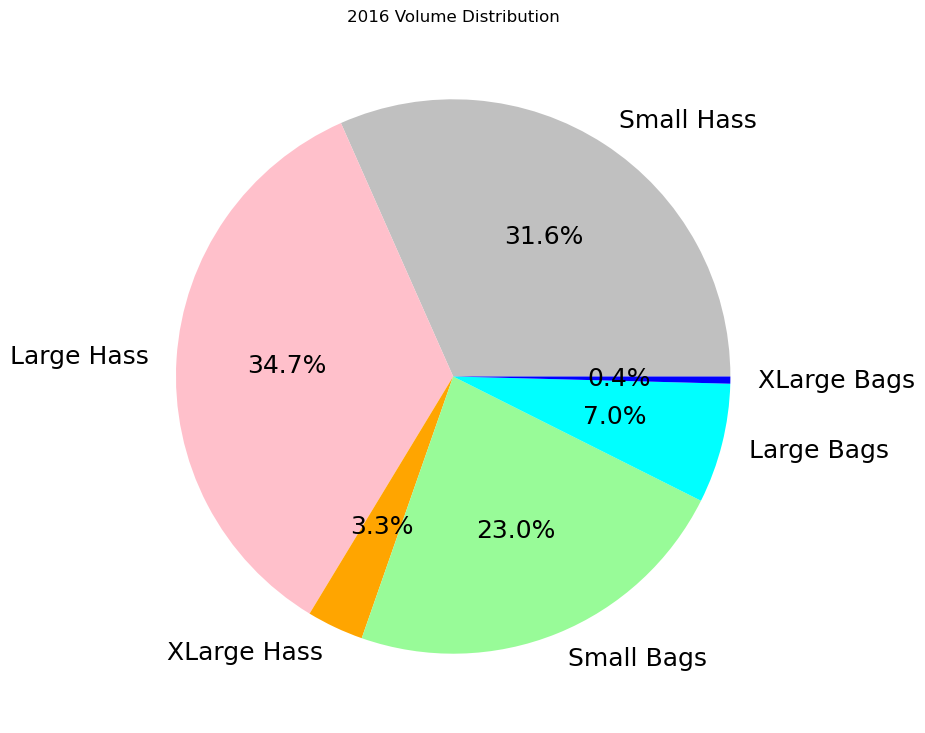

In [26]:
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

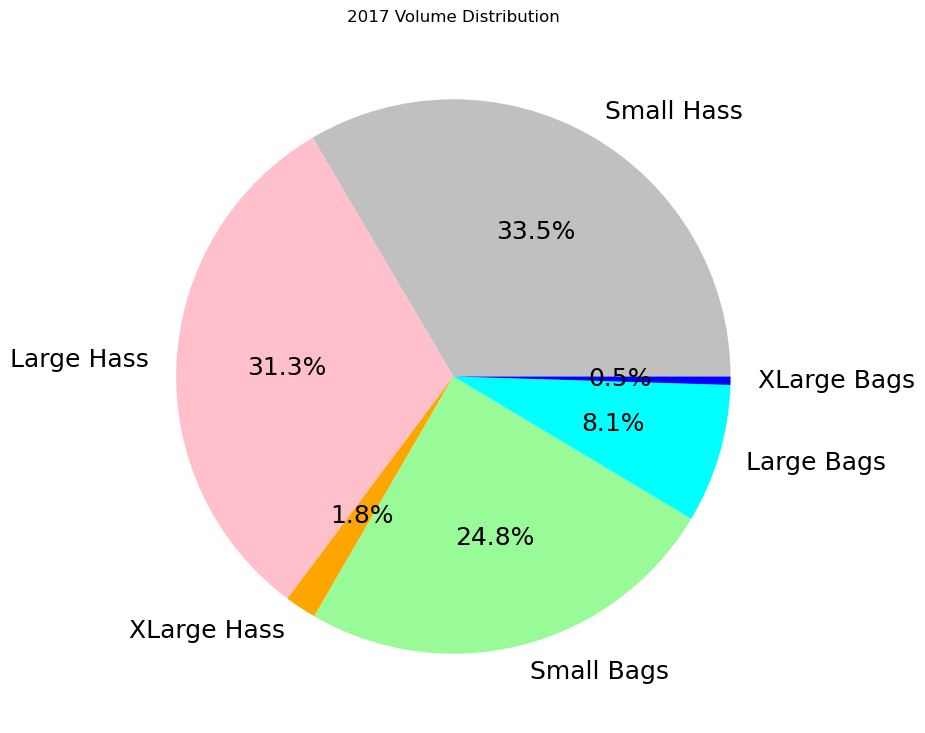

In [27]:
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

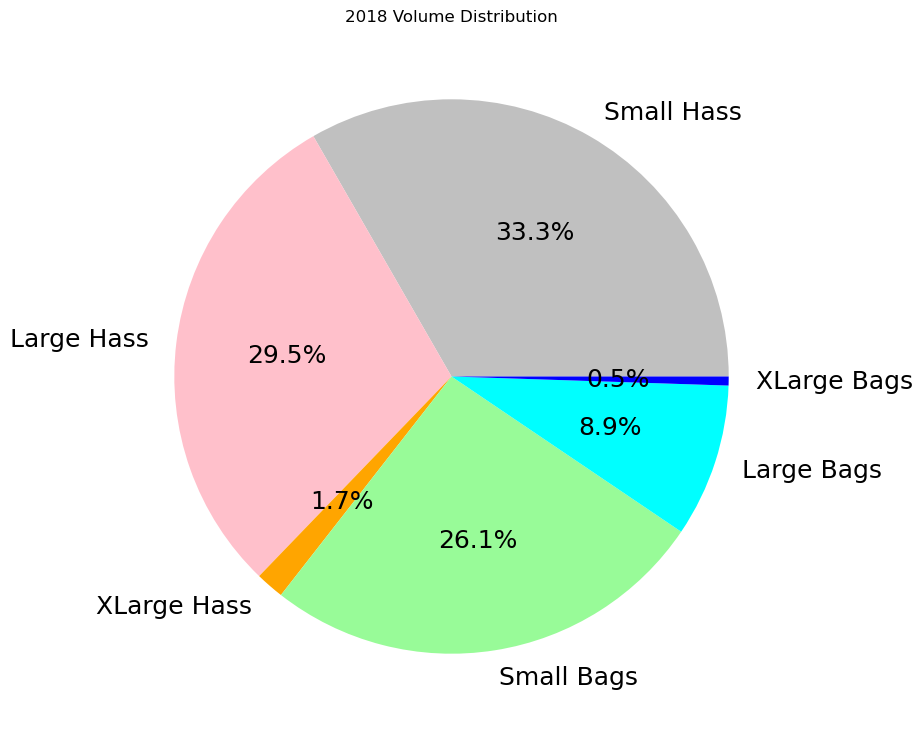

In [28]:
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

In [29]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

df = df.drop(['Total Bags'], axis = 1)

In [30]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.


df = df.drop(['Total Volume'], axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Small Hass    18249 non-null  float64
 2   Large Hass    18249 non-null  float64
 3   XLarge Hass   18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   year          18249 non-null  int64  
 9   region        18249 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [32]:
pd.set_option('display.width', 100)
 
correlations = df.corr(method='pearson')
print(correlations)

              AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
AveragePrice      1.000000   -0.208317   -0.172928    -0.179446   -0.174730   -0.172940   
Small Hass       -0.208317    1.000000    0.926110     0.833389    0.925280    0.838645   
Large Hass       -0.172928    0.926110    1.000000     0.887855    0.916031    0.810015   
XLarge Hass      -0.179446    0.833389    0.887855     1.000000    0.802733    0.698471   
Small Bags       -0.174730    0.925280    0.916031     0.802733    1.000000    0.902589   
Large Bags       -0.172940    0.838645    0.810015     0.698471    0.902589    1.000000   
XLarge Bags      -0.117592    0.699377    0.688809     0.679861    0.806845    0.710858   
year              0.093197    0.003353   -0.009559    -0.036531    0.063915    0.087891   

              XLarge Bags      year  
AveragePrice    -0.117592  0.093197  
Small Hass       0.699377  0.003353  
Large Hass       0.688809 -0.009559  
XLarge Hass      0.679861 -0

In [33]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()


,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,1.75,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,-0.17558,organic,2015,Southeast
9593,1.49,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,-0.17558,organic,2015,Chicago
10009,1.68,-0.231508,-0.244955,-0.212540,-0.240789,-0.222734,-0.17558,organic,2015,HarrisburgScranton
1819,1.52,-0.229254,-0.215680,-0.198007,-0.229080,-0.207730,-0.17558,conventional,2015,Pittsburgh
9333,1.64,-0.231635,-0.244189,-0.212540,-0.243927,-0.221965,-0.17558,organic,2015,Boise


In [34]:
# Specifying dependent and independent variables

X = df.drop(['AveragePrice'], axis = 1)
y = df['AveragePrice']

In [35]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)
Xcat

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
11569,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9593,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9018,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18141,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17673,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [37]:
X= pd.concat([Xcat, Xnum], axis = 1) # Concatenate dummy categorcal variables and numeric variables
X.shape

(18249, 60)

In [38]:
F_DF = pd.concat([y,X],axis=1)
F_DF.head(2)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
11569,1.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,-0.17558
9593,1.49,1,0,0,0,0,0,0,0,1,...,0,0,0,0,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,-0.17558


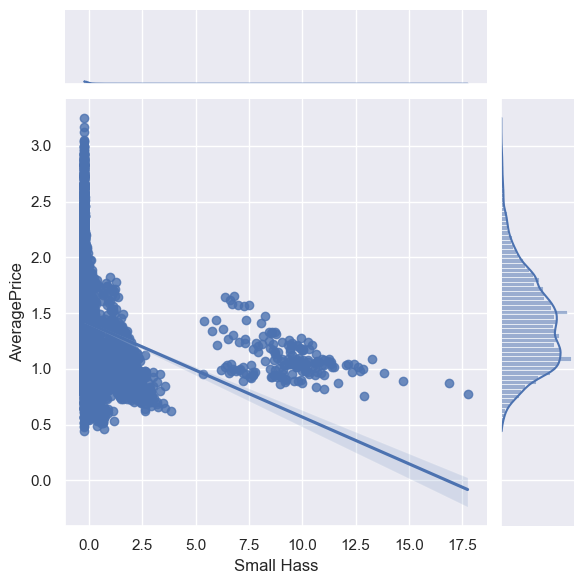

In [39]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;

import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg");

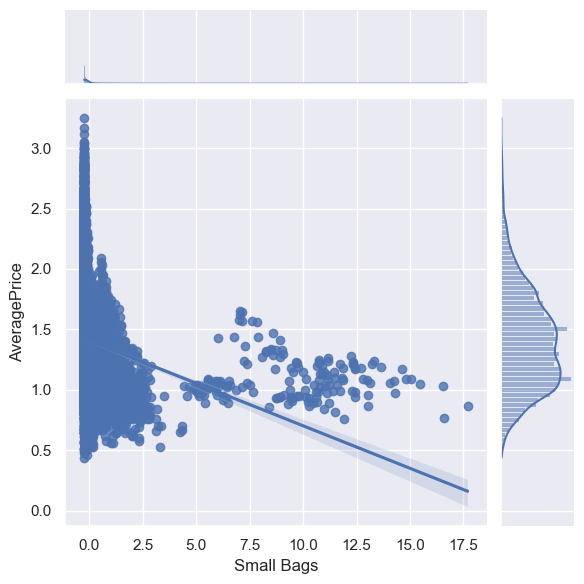

In [40]:
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg");

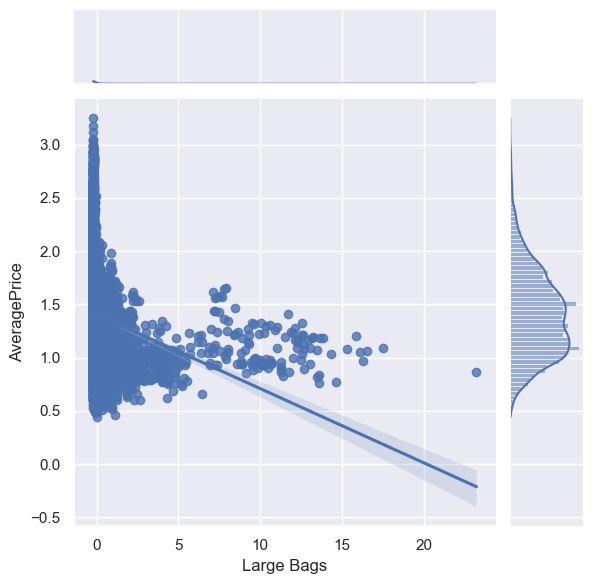

In [41]:
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg");

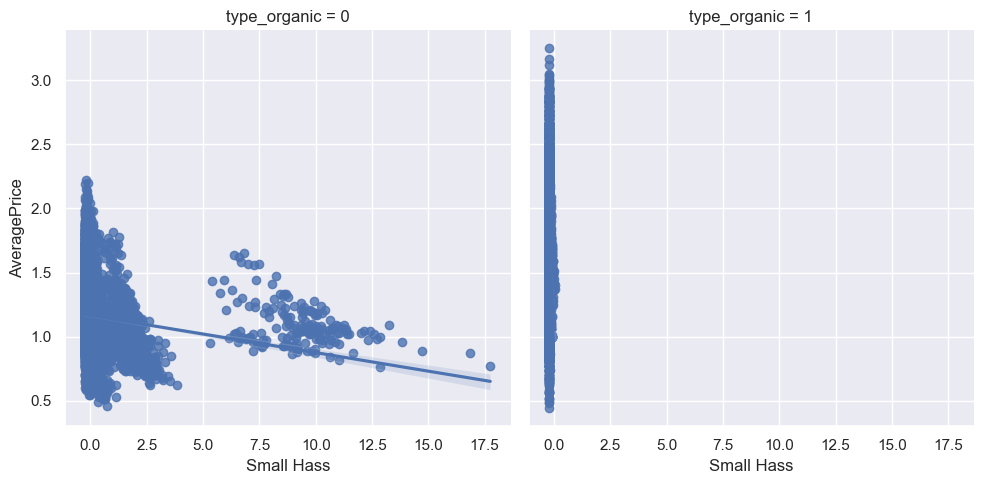

In [42]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2)

**Graphs shows that organic avocados have less elasticity to the price, compared to conventional ones.**

>## TRAIN and TEST SPLIT

**Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018) I sort it by Date and then split it due to date manually (not randomly), to preserve the 'times series effect' on it. I determined the split ratio as 0.30, so train and test data are just as follows;**

In [43]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

>## Implementing machine learning models
 >## Multiple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

R2 of Linear Regresson: 0.6960897862626354


In [45]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.27037617735375613
MSE:  0.12350250521748579
RMSE: 0.35142923216130695


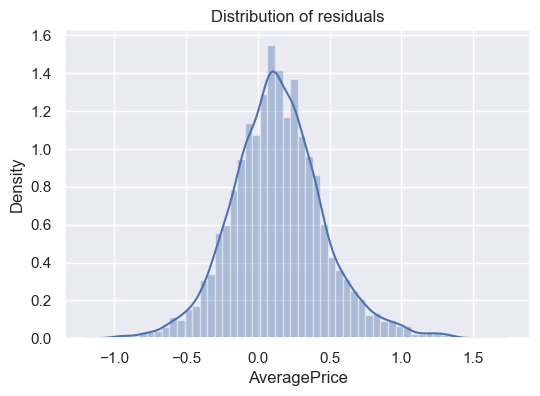

In [46]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Distribution of residuals');

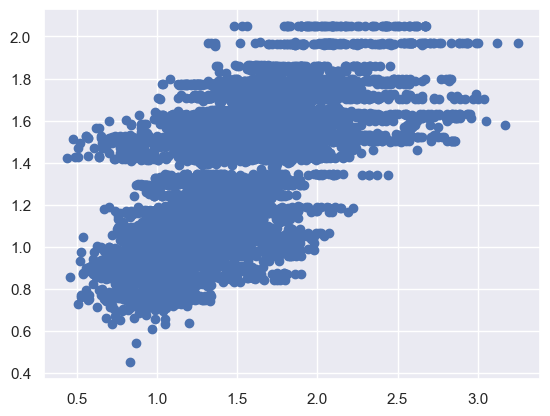

In [47]:
plt.scatter(y_test,LinReg.predict(X_test))

In [48]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     386.0
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:22:46   Log-Likelihood:                 1504.2
No. Observations:               10172   AIC:                            -2886.
Df Residuals:                   10111   BIC:                            -2446.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

>## LASSO and RIDGE Regressions

In [49]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [50]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5,3,20)

clf = GridSearchCV(estimator=linear_model.Ridge(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_R = clf.best_estimator_.alpha
print('Optimum regularization parameter (Ridge):', optlamGSCV_R)

clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_L= clf.best_estimator_.alpha
print('Optimum regularization parameter (Lasso):', optlamGSCV_L)

Optimum regularization parameter (Ridge): 0.1623776739188721
Optimum regularization parameter (Lasso): 1e-05


In [51]:
ridge = linear_model.Ridge(alpha = optlamGSCV_R) 
ridge.fit(X_train, y_train)
print('RMSE value of the Ridge Model is: ',np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))

RMSE value of the Ridge Model is:  0.3514117822750608


In [52]:
ridge.score(X_train, y_train) #Returns the coefficient of determination (R2) of the prediction.

0.6960818697958822

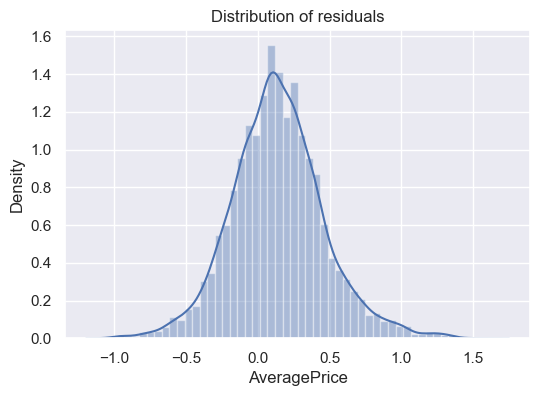

In [53]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - ridge.predict(X_test))
plt.title('Distribution of residuals');

In [54]:
lasso = linear_model.Lasso(alpha = optlamGSCV_L)
lasso.fit(X_train, y_train)
print('RMSE value of the Lasso Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

RMSE value of the Lasso Model is:  0.3513769955512451


In [55]:
lasso.score(X_train, y_train) #Returns the coefficient of determination R^2 of the prediction.

0.6960392986474159

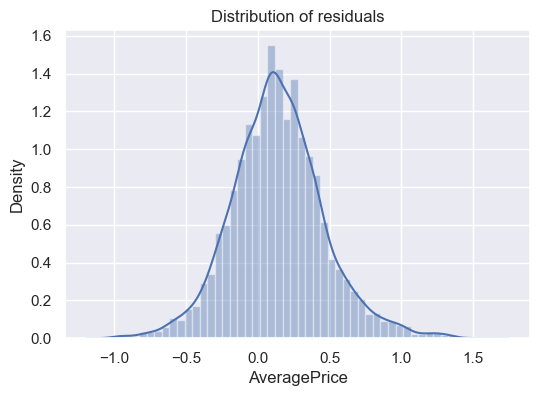

In [56]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lasso.predict(X_test))
plt.title('Distribution of residuals');

Lasso picked 60 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

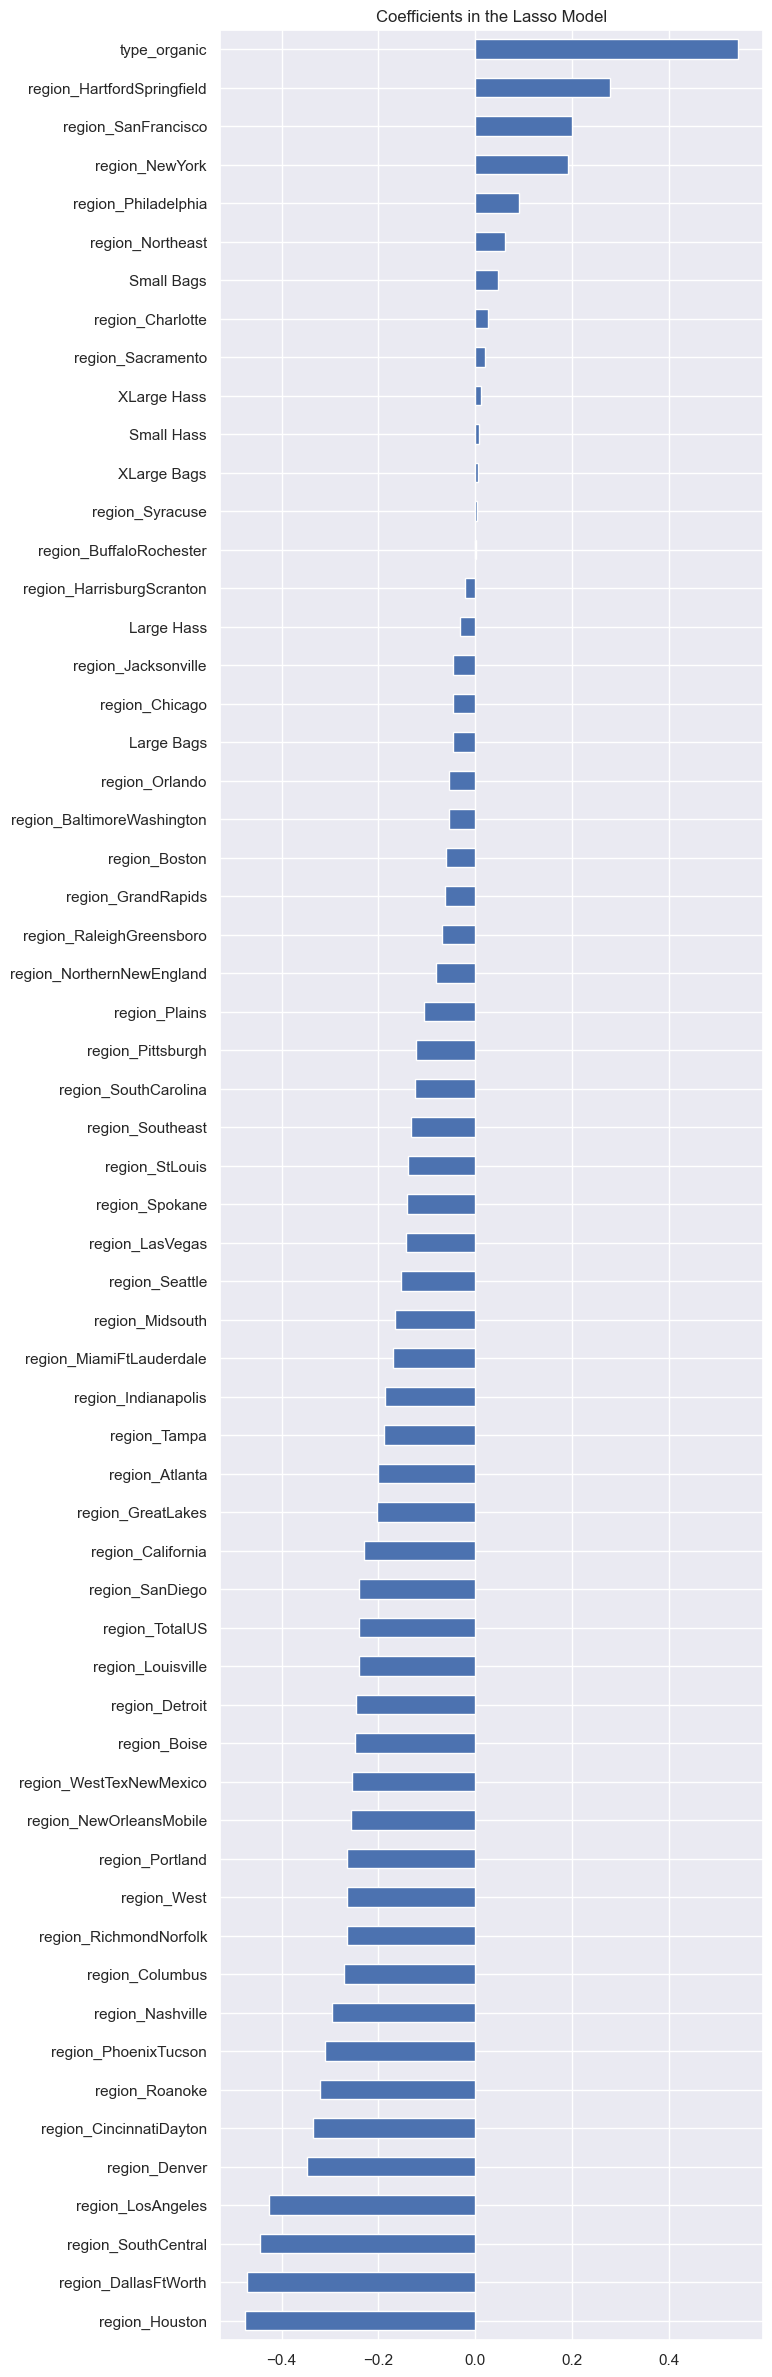

In [57]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()]) #plot all
matplotlib.rcParams['figure.figsize'] = (7.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

**Lasso picked 49 variables and eliminated the other 0 variables**

**According to the RMSE results, Ridge works best compared to linear regression and lasso.**

**Let's see the other ML Models' RMSE values;**

># KNN Regressor

In [58]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.3365758255857085


In [59]:
Knn.score(X_train, y_train)  # R2 of the KNN model

0.9373175217773652

># SVR Regressor

In [60]:
from sklearn.svm import SVR
from sklearn import svm
# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.6919485208827522
poly 0.7413617843023481
rbf 0.7756996415569645
sigmoid -111200.15970219963


In [61]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

In [62]:
Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.7959933663820001


In [63]:
error = sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.3226315763021518


In [64]:
Svr.predict(X_test)[0:5]  # print the first 5 predictions of our test set

array([1.3563792 , 1.34962809, 0.88616364, 1.02629703, 1.15836097])

In [65]:
y_test[0:5]

14334    1.36
3077     1.60
3389     1.08
4013     1.23
3805     1.31
Name: AveragePrice, dtype: float64

># Decision Tree Regressor

In [66]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000
for depth in range(2,10):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Depth:",depth,", MSE:", mse)
    print("Depth:",depth, ",RMSE:", rmse)
    if rmse < minRMSE:
        minRMSE = rmse
        minDepth = depth
        print("MinDepth:", minDepth)
        print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.14297492900435163
Depth: 2 ,RMSE: 0.37812025733138344
MinDepth: 2
MinRMSE: 0.37812025733138344
Depth: 3 , MSE: 0.14687958076314467
Depth: 3 ,RMSE: 0.38324871919309095
Depth: 4 , MSE: 0.1390123405178883
Depth: 4 ,RMSE: 0.37284358720231237
MinDepth: 4
MinRMSE: 0.37284358720231237
Depth: 5 , MSE: 0.14108913531114842
Depth: 5 ,RMSE: 0.3756183372935198
Depth: 6 , MSE: 0.13980396138162166
Depth: 6 ,RMSE: 0.37390367928334384
Depth: 7 , MSE: 0.142001018093276
Depth: 7 ,RMSE: 0.3768302244954298
Depth: 8 , MSE: 0.1397774089851133
Depth: 8 ,RMSE: 0.3738681705964193
Depth: 9 , MSE: 0.1385387992010419
Depth: 9 ,RMSE: 0.3722080052887658
MinDepth: 9
MinRMSE: 0.3722080052887658


In [67]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train)) 

0.8424402878121808


In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.2785656082289714
MSE: 0.1384342511530868
RMSE: 0.3720675357419494


># Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train)) 

0.986845513469198


In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.25592666831744454
MSE: 0.11947644563204159
RMSE: 0.34565364981733027


>## CONCLUSION
># Comparing The RMSE Values Of The Models

In [71]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))),4))

# Ridge RMSE             : 
print('RMSE value of the Ridge Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),4))

# Lasso RMSE             : 
print('RMSE value of the Lasso Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Knn.predict(X_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Svr.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))),4))

RMSE value of the Linear Regr :  0.3514
RMSE value of the Ridge Model :  0.3514
RMSE value of the Lasso Model :  0.3514
RMSE value of the KNN Model   :  0.3366
RMSE value of the SVR Model   :  0.3226
RMSE value of the Decis Tree  :  0.3721
RMSE value of the Rnd Forest  :  0.3457


**SVR model gives the best predicts. (coefficient of determination of 82%)**